In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

# 1. KNN for Classification

Check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) for ``sklearn.neighbors.KNeighborsClassifier``.  Below are three important parameters： 

- **n_neighbors**: int,`` default=5``. Number of neighbors to use. 
- **p**: int, ``default=2``, which means euclidean_distance (l2) will be used. When `p` = 1, use manhattan_distance (l1). 
-  **weights**:  Weight function used in prediction.  ``Default= ‘uniform’``, which means all neighbors are weighted equally. Other options include ``‘distance’`` : i.e., weight instances by the inverse of their distance to the new instance (i.e., weighted voting).

Let's use the default setting for modeling and prediction: i.e., euclidean distance with uniform weights for all neighbors.

## 1.1 Data Preparation

The **iris** data set consists of **4 features for 150 flowers**:  Sepal Length, Sepal Width, Petal Length, and Petal Width.  The target variable is the **species** of those flowers: ``Setosa(0)``, ``Versicolour(1)``, and ``Virginica(2)``. 

Check [this link]( https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) for more details of this dataset.



In [2]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y = True, as_frame = True)

display(y.unique(), X.describe())  # display unique values of y,   descriptive statistics of X 

array([0, 1, 2])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 1.1(a) Split data

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(105, 4)

(45, 4)

(105,)

(45,)

### 1.1(b) Scale features

``StandardScaler`` standardizes the data by removing the mean from each value and devide the result by standard deviation. Check [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) for details.


$$
z = \frac{x - u}{\sigma\ } \quad \
$$


After standardization, the mean of scaled training feature will be 0, and standard deviation will be 1.

- Check the mean (u) and standard deviation (𝝈) of the scaled test features, why their mean is not 0 and std is not 1?   

In [4]:
from sklearn.preprocessing import StandardScaler    

scaler = StandardScaler()                           # define the scaler

scaler.fit(X_train)                                 # train the scaler on training data   
X_train_scaled = scaler.transform(X_train)          # apply the scaler to transform the training data
#X_train_scaled = scaler.fit_transform(X_train)     # combine the above two lines together

X_test_scaled = scaler.transform(X_test)            # apply the scaler to transform test data

print("Mean for X_train_scaled: ", X_train_scaled.mean(axis = 0))   # aggregate across rows (default = None for numpy array) 
print("Std for X_train_scaled: ", X_train_scaled.std(axis = 0))
print("Mean for X_test_scaled: ", X_test_scaled.mean(axis = 0))
print("Std for X_test_scaled: ", X_test_scaled.std(axis = 0))

Mean for X_train_scaled:  [-1.24979392e-15 -4.86383420e-17 -1.14194368e-16  3.02403605e-16]
Std for X_train_scaled:  [1. 1. 1. 1.]
Mean for X_test_scaled:  [-0.19098204  0.09539869 -0.13098187 -0.12144323]
Std for X_test_scaled:  [0.78888297 0.95940172 0.92394678 0.92084194]



## 1.2  Modeling


### 1.2(a) Train ``m1`` with ``k``=1



In [5]:
m1 = KNeighborsClassifier(n_neighbors=1)  

m1.fit(X_train_scaled, y_train)

train_score = m1.score(X_train_scaled, y_train)
test_score = m1.score(X_test_scaled,y_test)

print("1-NN Train Acc: {:.2%}; Test Acc: {:.2%}".format(train_score,test_score))  # 100% training accuracy

1-NN Train Acc: 100.00%; Test Acc: 93.33%


**Check the neighbors**

The ``kneighbors`` method shows the neighbors for given instances:   (1) the distance(s) between each instance and its nearest neighbor(s); (2) the index of the neighbor(s) for each instance.

Let's check the training instances' neighbors (can also be applied to test).

- Note that when ``k`` = 1, the nearest neighbor for a training instance is itself.

In [ ]:
#m1.kneighbors(X_train_scaled)   # uncomment to see the result: distances are all 0, index are themselves


**Predict class labels**

- Let's apply the model to predict test instance's target value. 

In [7]:
m1.predict(X_test_scaled)       #  use X_test_scaled for prediction.

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

**Estimate class probability**

Estimate the class probability for each test instance.  **Why the probabilities are either 100% or 0%?**

In [8]:
m1.predict_proba(X_test_scaled)  

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]])

### 1.2(b) Train  ``m2`` (k = 5)  and ``m3`` (k = 50)

- Please check the train and test accuracy for each model. Which one is better?
- Estimate the class probabilities for test instances. 

<font color=red>***Exercise 1: Your Codes Here***</font>  

In [9]:
m2 = KNeighborsClassifier(n_neighbors=5)
m2.fit(X_train_scaled, y_train)
train_score = m2.score(X_train_scaled, y_train)
test_score = m2.score(X_test_scaled,y_test)
print("5-NN Train Acc: {:.2%}; Test Acc: {:.2%}".format(train_score,test_score))

5-NN Train Acc: 97.14%; Test Acc: 97.78%


In [11]:
m3 = KNeighborsClassifier(n_neighbors=50)
m3.fit(X_train_scaled, y_train)
train_score = m3.score(X_train_scaled, y_train)
test_score = m3.score(X_test_scaled, y_test)
print("50-NN Train Acc: {:.2%}; Test Acc: {:.2%}".format(train_score,test_score))

50-NN Train Acc: 84.76%; Test Acc: 86.67%


## 1.3 GridSearchCV

- Bigger ``k`` values:     more neighbors used in prediction, simpler model (decision boundary).
- Smaller ``k`` values:    less neigbors used, more complicated model which tends to overfit. 

In [13]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

k_range = {'n_neighbors': np.arange(1,84,2)}                            #  k = 1,3,5, ... 83, why max k = 83? 

grid = GridSearchCV(estimator = knn, param_grid = k_range, cv = 5)      # 5-CV on train (105 - sub_train 84 + validation 21)

grid.fit(X_train_scaled, y_train)       # search over the values on Train data (with 5-cv)

best_param = grid.best_params_          # k value that returns highest mean cv score during cv
best_cv_score = grid.best_score_        # mean cv score of the best k  

print("Best Params: {}".format(best_param)) 
print("Mean cv score of the best k: {:.2%}".format(best_cv_score)) 

Best Params: {'n_neighbors': np.int64(5)}
Mean cv score of the best k: 95.24%


### 1.3(a) Visualize mean cv scores for each k value



Use `matplotlib.pyplot.plot` function (check [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)) to create a line (i.e., the model).   By default, a solid blue line is created to connect all points. 

- `x` : the horizontal coordinate of the data points.
- `y` : the vertical coordinate of the data points.

Note the function relies on **positional arguments** for `x`,  `y` (and `fmt`), NOT **keyword argument**, therefore there is no need to specify the parameter names.  

- Other keyword parameters such as  `linewidth`, `markersize`, `color`/`c` (which override the color in `fmt`) should be placed after positional paramters.

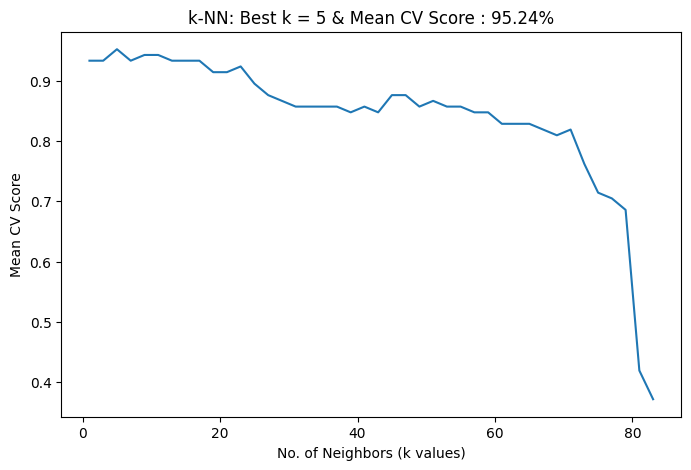

In [14]:
k_values = grid.cv_results_['param_n_neighbors']        # k values, same as k_range['n_neighbors']
cv_scores = grid.cv_results_['mean_test_score']         # mean cv scores for each k   

plt.figure(figsize = (8, 5))
plt.plot(k_values,  cv_scores)        # a line plot (default blue solid line)
plt.xlabel('No. of Neighbors (k values)')
plt.ylabel('Mean CV Score')
plt.title('k-NN: Best k = {} & Mean CV Score : {:.2%}'.format(best_param['n_neighbors'], best_cv_score))
plt.show()

### 1.3(b) Evaluate and apply the best model 

- Note that the best model was refitted on entire training data in the search process. 

In [15]:
grid.score(X_test_scaled,y_test)     #check the best model's generalization performance

#Alternatively
#knn_best = grid.best_estimator_    
#knn_best.score(X_test_scaled,y_test)

0.9777777777777777

In [16]:
grid.predict(X_test_scaled)          # class predictions on test set

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [17]:
grid.predict_proba(X_test_scaled)   # class probability estimation test set

array([[0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0.8, 0.2],
       [0. , 1. , 0. ],
       [0. , 0.2, 0.8],
       [0. , 1. , 0. ],
       [0. , 0.8, 0.2],
       [0. , 0.6, 0.4],
       [0. , 0.8, 0.2],
       [1. , 0. , 0. ],
       [0. , 0.6, 0.4],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.8, 0.2],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.2, 0.8],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.4, 0.6],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.2, 0.8],
       [0. , 0.8, 0.2],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. 

# 2. K-Means Clustering

## 2.1 Data Preparation 

The **Wholesale Customer Data**  comes from the Machine Learning Data Repository of UC Irvine.  Check [this link](https://archive.ics.uci.edu/ml/datasets/wholesale+customers) for more details 

- Here we removed 19 outliers for simplicity, so the data contains only 421 instances.

There are in total 8 variables: 

- ``Channel``: Horeca (Hotel/Restaurant/Cafe) or Retail channel (Categorical);
- ``Region``: Lisnon, Oporto or Other (Categorical); 
- ``Fresh``: annual spending on fresh products (Continuous);
- ``Milk``: annual spending on milk products (Continuous);
- ``Grocery``: annual spending on grocery products (Continuous);
- ``Frozen``: annual spending on frozen products (Continuous);
- ``Detergents_Paper``: annual spending on detergents and paper products (Continuous);
- ``Delicassen``: annual spending on and delicatessen products (Continuous);


We'd like to group those customers into different clusters according to their purchasing patterns. **As here we only want to explore the underlying structure of our customers, here we use the entire dataset in model training.**  

 


In [18]:
cust_df = pd.read_csv('Wholesale_customers_v2.csv')   # modify data path if needed

X = cust_df.drop(columns = ['Channel', 'Region'])     # remove two irrelant columns 

display(X.shape, X.head())

(421, 6)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


**Scale the Data**

In [19]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)                             # fit/transform on the entire data

X_scaled = pd.DataFrame(data = X_scaled, columns = X.columns)  # convert the array as a named dataframe   

X_scaled.describe()   # After standardization: mean = 0, std = 1

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,4.210000e+02,4.210000e+02,4.210000e+02,4.210000e+02,4.210000e+02,4.210000e+02
mean,1.265812e-17,5.063250e-17,-8.438750e-18,5.063250e-17,6.751000e-17,4.641312e-17
std,1.001190e+00,1.001190e+00,1.001190e+00,1.001190e+00,1.001190e+00,1.001190e+00
min,-1.078911e+00,-1.002890e+00,-1.012455e+00,-8.594059e-01,-7.087221e-01,-1.015041e+00
25%,-7.713914e-01,-7.179169e-01,-7.082173e-01,-6.380164e-01,-6.382488e-01,-6.979501e-01
50%,-2.722736e-01,-3.024545e-01,-3.595431e-01,-3.812313e-01,-4.836532e-01,-2.929125e-01
75%,4.879954e-01,3.797366e-01,4.018331e-01,2.148174e-01,3.609123e-01,3.517588e-01
max,4.260736e+00,4.914126e+00,4.622410e+00,5.098075e+00,4.697110e+00,5.311452e+00


## 2.2 Modeling 

The ``sklearn.cluster.KMeans`` function find cluster centroids that minimise the **inertia** or **SSE**. 

- <font color=red>**n_clusters**</font>: int, ``default=8``. The number of clusters to form.
- **init**: method for initialization, ``default=‘k-means++’`` pushes the centroids as far as possible from each other.  Other options include ``‘random’`` or any array.
- **n_init**: int, the number of iterations the algorithm will be run with different initial centroids,  that returns the best output after `n_init` consecutive runs will be the used as initial centroids. By `default = 'auto'`: i.e., 10 if `init='random'`; 1 if `init='k-means++'` or an array-like.
- <font color=red>**random_state**</font>: int, ``default = None``, it determines the random number generation for centroid initialization. 
- **max_iter**: int, ``default=300``, the maximum number of iterations of the algorithm for a single run.
- **tol**: float, ``default=1e-4``, the minimum SSE change between two consecutive iterations to declare convergence.

Check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)  for details.   

### 2.2(a) Train a model ``model`` with  ``k`` = 2

- Let's use two features ``Fresh`` & ``Milk`` only. 

In [21]:
X_sub = X_scaled[['Fresh','Milk']]                     # 2D array    

kmeans = KMeans(n_clusters = 2, random_state = 0)      # set random_state for reproducible result

kmeans.fit(X_sub)           

kmeans.n_iter_             #  iterations taken to converge 

c:\Users\betoq\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


6

### 2.2(b) Cluster allocation and clustering quality 

**Cluster Allocation**  

Cluster labels will be assigned to each instance automatically in model training process, the labels can be obtained with ``.labels_`` attribute.  
- When apply the model to predict the cluster labels for new instances, use the ``predict`` method. 

In [22]:
kmeans.labels_                # cluster labels (for training instances)

#kmeans.predict(X_sub)        # same as above 

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

**Clustering Quality**

Clustering quality is measured by **SSE/Inertia**, which is obtained with the `.inertia_` attribute.
- The ``.score`` method will return the opposite of SSE (a negative SSE): larger scores means better clustering quality. It is useful in GridSearch and Cross-validation. 

In [23]:
kmeans.inertia_              # SSE: the smaller, the better the model is

#kmeans.score(X_sub)         # score: negative SSE (the bigger, the better the model is)

546.7008974797891

### 2.2(c) Check cluster centroids

The centroids are usually the **means feature values of instances in the same cluster**, which can be obtained with the `.cluster_centers_` attribute.

- Note if the algorithm stops before fully converging (due to the setting of ``tol`` or ``max_iter``),  the ``cluster_centers_`` are NOT the means of instances in each cluster (i.e., cluster means).

  The reason is in the last iteration, the model stops after cluster allocation, then the cluster centroids will not be updated with the new means.

- Here our algorithm has been fully converged (i.e., no change in the cluster centroids in the last iteration).


In [24]:
centroids = kmeans.cluster_centers_      # cluster centroids, save for later use
centroids

# alternatively, caculate the centroids mannually
#[X_sub.loc[kmeans.labels_ == 0,'Fresh'].mean(), X_sub.loc[kmeans.labels_ == 0,'Milk'].mean()]    # m1 centroid 
#[X_sub.loc[kmeans.labels_ == 1,'Fresh'].mean(), X_sub.loc[kmeans.labels_ == 1,'Milk'].mean()]    # m2 centroid 

array([[-0.5211405 ,  0.12087991],
       [ 1.27722138, -0.29625486]])

### 2.2(d) Visualize data and cluster centroids

- Use `matplotlib.pyplot.scatter` function to create scatter plots. Check [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) for details.

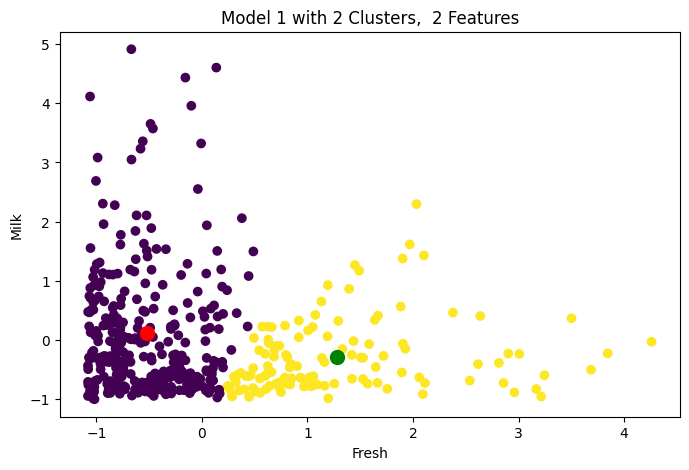

In [25]:
df = X_sub.copy()                      # create a copy to avoid warning message (optional)

df['cluster'] = kmeans.labels_         # save cluster labels for each instance in a new col

plt.figure(figsize = (8, 5))
plt.scatter(x = df['Fresh'], y = df['Milk'], c = df['cluster'])              # map color to cluster labels (numbers)
plt.scatter(x = centroids[0,0], y = centroids[0,1], c = 'red', s = 100)      # mark 1st centroid as red, adjust marker size a bit
plt.scatter(x = centroids[1,0], y = centroids[1,1], c = 'green', s = 100)    # mark 2nd centroid as green
plt.xlabel("Fresh")
plt.ylabel("Milk")
plt.title('Model 1 with 2 Clusters,  2 Features')
plt.show()

## 2.3 Find the Best ``k`` Value  

Now let's try all 6 features here: i.e., use `X_scaled` in modeling.

### 2.3(a) The elbow method 

The elbow method compares the **clustering quality** for k-means with different k values (often on the training data itself) and choose the **minimum k** value which yields a **relatively low SSE**.

In [26]:
k_range = np.arange(1, 31, 1)       # compare 30 k values: 1,2,3..,30

SSEs = []           # create an empty list 
for k in k_range:   # loop over all k values
    model = KMeans(n_clusters = k, random_state = 0).fit(X_scaled)      # train the model 
    SSEs.append(model.inertia_)                                         # append SSE one by one to the list

len(SSEs)           # how many SSE are there?

c:\Users\betoq\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\betoq\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\betoq\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\betoq\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

30

Again, we use `matplotlib.pyplot.plot` function (check [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)) to create a line plot.  A simple way to adjust the line and marker is format string (`fmt`).

- `fmt`: optional, a format string consists of color, marker and line.

Note the function relies on **positional arguments** for `x`,  `y` (and `fmt`), NOT **keyword argument**, therefore there is no need to specify the parameter names.  

- Other keyword parameters such as  `linewidth`, `markersize`, `color`/`c` (which override the color in `fmt`) should be placed after positional paramters.

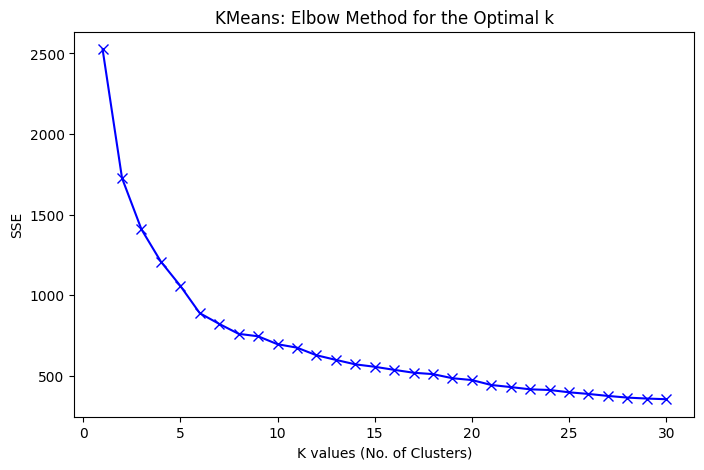

In [27]:
# visualize the plot

plt.figure(figsize = (8,5)) 

plt.plot(k_range, SSEs,  'bx-',  markersize = 7)                      # 'bx-': blue line with cross as markers
#plt.plot(k_range, SSEs, c = 'blue', linestyle = '-', marker = 'x', markersize = 7)       # same as above
plt.xlabel("K values (No. of Clusters)")
plt.ylabel("SSE")
plt.title('KMeans: Elbow Method for the Optimal k')
plt.show()

### 2.3(b) The GridSearchCV method

<font color=red>***Exercise 2: Your Codes Here***</font>  

Please perform ``GridSearchCV`` with 5-fold cv on `X_scaled` to find the best ``k`` from the same range as 2.3(a), use the same random state.   


 
- Check the best k value and its mean cv score during cross-validation.  **Does the best k value make sense?** 
- Visualize the mean cv scores againt the k values.     

Note the ``GridSearchCV`` function compares **the mean generalization score (i.e., negative SSE)** in cross-validation. 



c:\Users\betoq\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\betoq\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\betoq\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\betoq\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

Best Params: {'n_clusters': np.int64(30)}
Mean cv score of the best k: -10549.20%


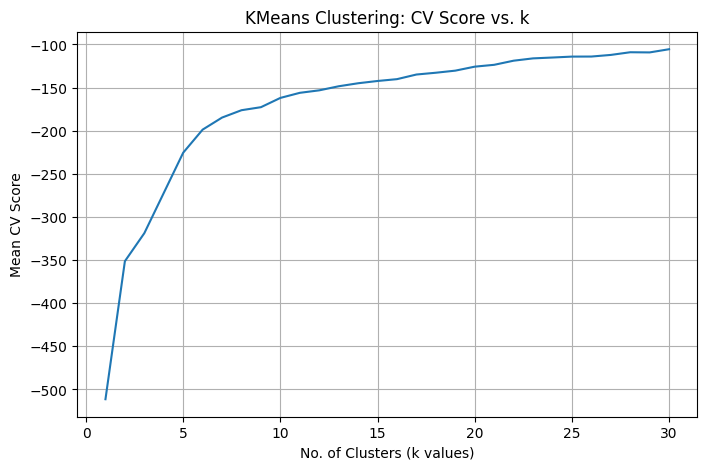

355.19401237399

In [32]:
model = KMeans(n_clusters = 5, random_state = 0)   # define the model with k = 5
k_range = {"n_clusters": np.arange(1, 31, 1)}                            # k = 1,2,3,...,20
grid2 = GridSearchCV(estimator = model, param_grid = k_range, cv = 5)      # 5-CV on train (105 - sub_train 84 + validation 21)
grid2.fit(X_scaled)        # search over the values on the entire data (with 5-cv)
best_param2 = grid2.best_params_          # k value that returns highest mean cv score during cv
best_cv_score2 = grid2.best_score_        # mean cv score of the best k
print("Best Params: {}".format(best_param2)) 
print("Mean cv score of the best k: {:.2%}".format(best_cv_score2))
k_values2 = grid2.cv_results_['param_n_clusters']        # k values, same as k_range['n_neighbors']
cv_scores2 = grid2.cv_results_['mean_test_score']         # mean cv scores for each k
plt.figure(figsize = (8, 5))
plt.plot(k_values2,  cv_scores2)        # a line plot (default blue solid line)
plt.xlabel('No. of Clusters (k values)')
plt.ylabel('Mean CV Score')
plt.title('KMeans Clustering: CV Score vs. k')
plt.grid()
plt.show()
grid2.best_estimator_.inertia_     #check the best model's SSE